In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./train.csv',sep=',')
pd.set_option('display.max_columns',df.shape[1])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option('display.max_rows',df.shape[1])
round(100*(df.isnull().sum()/len(df.index)),4)

Id                0.0000
MSSubClass        0.0000
MSZoning          0.0000
LotFrontage      17.7397
LotArea           0.0000
Street            0.0000
Alley            93.7671
LotShape          0.0000
LandContour       0.0000
Utilities         0.0000
LotConfig         0.0000
LandSlope         0.0000
Neighborhood      0.0000
Condition1        0.0000
Condition2        0.0000
BldgType          0.0000
HouseStyle        0.0000
OverallQual       0.0000
OverallCond       0.0000
YearBuilt         0.0000
YearRemodAdd      0.0000
RoofStyle         0.0000
RoofMatl          0.0000
Exterior1st       0.0000
Exterior2nd       0.0000
MasVnrType        0.5479
MasVnrArea        0.5479
ExterQual         0.0000
ExterCond         0.0000
Foundation        0.0000
BsmtQual          2.5342
BsmtCond          2.5342
BsmtExposure      2.6027
BsmtFinType1      2.5342
BsmtFinSF1        0.0000
BsmtFinType2      2.6027
BsmtFinSF2        0.0000
BsmtUnfSF         0.0000
TotalBsmtSF       0.0000
Heating           0.0000


# EDA

### From Above we can see that Alley column has 93% of null values,PooQc has 99% null Values,Fence has 80% null values and MiscFeature has 96% null values.
we can even see that Id column is just used to represent each entry and doesnt hold any significance in our analysis.
So dropping those columns except Misc features 

In [4]:
df.drop(columns=['PoolQC','Fence','Alley','Id'],inplace=True,axis=1)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [7]:
print(df.SalePrice.mean())
print(df.SalePrice.median())

180921.19589041095
163000.0


In [8]:
df.loc[~df.MiscFeature.isnull(),['MiscFeature','SalePrice']].head(60)

,MiscFeature,SalePrice
5,Shed,143000
7,Shed,200000
16,Shed,149000
17,Shed,90000
51,Shed,114500
84,Shed,168500
95,Shed,185000
98,Shed,83000
99,Shed,128950
106,Shed,100000


lets drop MiscFeatures

In [9]:
df.drop(columns='MiscFeature',inplace=True)

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
catcol = [feature for feature in df.columns if df[feature].dtype=='O']
catcol

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [12]:
df[catcol].shape[1]

39

So there are 39 categorical column

In [13]:
for feature in catcol:
    print(feature,df[feature].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [14]:
for feature in catcol:
    print(feature,df[feature].value_counts())

MSZoning RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street Pave    1454
Grvl       6
Name: Street, dtype: int64
LotShape Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste  

In [15]:
catnull= [feature for feature in df[catcol].columns if df[feature].isnull().sum()>0]
catnull

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [16]:
round(100*(df[catnull].isnull().sum()/len(df.index)),4)

MasVnrType       0.5479
BsmtQual         2.5342
BsmtCond         2.5342
BsmtExposure     2.6027
BsmtFinType1     2.5342
BsmtFinType2     2.6027
Electrical       0.0685
FireplaceQu     47.2603
GarageType       5.5479
GarageFinish     5.5479
GarageQual       5.5479
GarageCond       5.5479
dtype: float64

### Lets replace missing null values in categorical columns as Missing.

In [17]:
df[catnull] = df[catnull].fillna('Missing')

In [18]:
df[catnull].loc[20:30,:]

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
20,BrkFace,Ex,TA,Av,Unf,Unf,SBrkr,Gd,BuiltIn,RFn,TA,TA
21,None,TA,TA,No,Unf,Unf,FuseF,Gd,Attchd,Unf,TA,TA
22,BrkFace,Gd,TA,No,Unf,Unf,SBrkr,Gd,Attchd,RFn,TA,TA
23,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,Attchd,Unf,TA,TA
24,None,TA,TA,Mn,Rec,ALQ,SBrkr,TA,Attchd,Unf,TA,TA
25,Stone,Gd,TA,No,Unf,Unf,SBrkr,Gd,Attchd,RFn,TA,TA
26,None,TA,TA,Mn,BLQ,Rec,SBrkr,Missing,Detchd,Unf,TA,TA
27,Stone,Ex,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA
28,None,TA,TA,Gd,BLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA
29,None,TA,TA,No,Unf,Unf,SBrkr,Missing,Detchd,Unf,Fa,TA


In [19]:
round(100*(df[catnull].isnull().sum()/len(df.index)),4)

MasVnrType      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
FireplaceQu     0.0
GarageType      0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

In [20]:
def cat_plot(x,y,data):
    plt.figure(figsize=(25,200))
    for var in x:
        plt.subplot(20,2,x.index(var)+1)
        sns.boxplot(y=y,x=var, data=data)
        plt.xticks(rotation=90,labels=None)
        plt.title(var)
    plt.show()

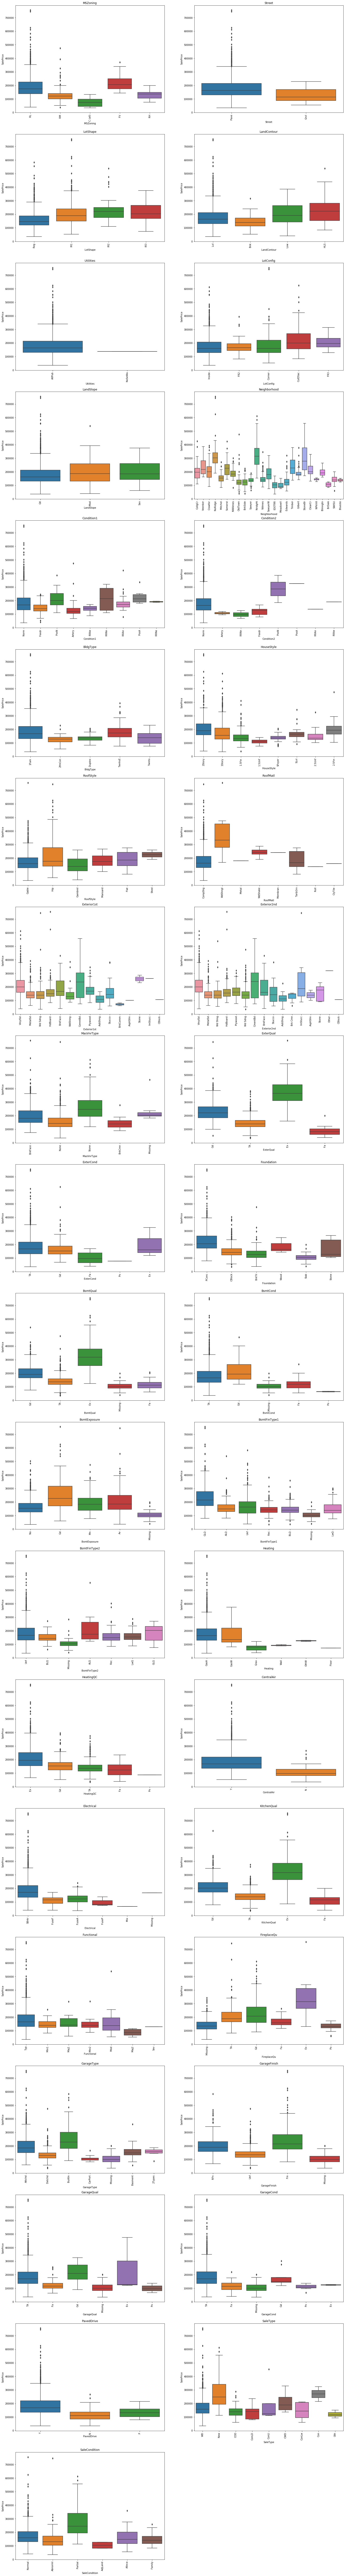

In [21]:
cat_plot(x=catcol,y='SalePrice',data=df)

We replaced the null values in categorical columns as Missing and plotted the boxplot we see that Boxplots with missing values had on an average the least SalePrice

#### For Category Sale condition the Sale Price was maximum for Partial and least for Adjoining Land Purchase.
#### For Category SaleType the SalePrice was maximum for New and least for others.
#### For category pavedDrive the SalePrice was high when there was a drive way.
#### For category garagecond the SalePrice was high when garage condition was Typical/Average to Good.
#### For category GarageQual the SalePrice was high when garage Quality was Excellent
#### For category GarageFinish the SalePrice was high when the garage was finished and saleprice was low when garage was unfinished
#### we had replaced Na values with Missing so Garage NA is mapped to Missing and when the garage is missing the SalePrice is further low.
#### From Garagetype Builtin For Homes with Built in garage the SalePrice was higher
#### When FirePlace was Excellent or good the SalePrice was high whereas when the home didn't have a fire place the price was low.

#### Homes which had central Airconditioner the Price was high.
#### Homes with Excellent HeatingQC had high price.
#### Homes which had GasA type of heating had high price and homes which had Floortype of heating had low price.
#### For Homes with GoodBasement Condition and Excellent Basement Quality had Higher Prices.

#### When the Foundation of the house was of Poured Contrete or Stone the Price of the house was higher.
#### when the external quality of the house was Excellent the Saleprice was higher.
#### when the house was of single family detached(1fam) the price was higher.
#### When the house was in Residential low density zone the price was higher.
#### when the street was paved the saleprice was higher.
#### Price of the house was higher when lotconfig was CulDSac.



In [22]:
numerical = [feature for feature in df.columns if df[feature].dtype!='O']

In [23]:
len(numerical)

37

In [24]:
yearcol = [feature for feature in df[numerical].columns if 'yr' in feature.lower() or 'year' in feature.lower()]
yearcol

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

let us take the difference between year variable and the year house was sold for

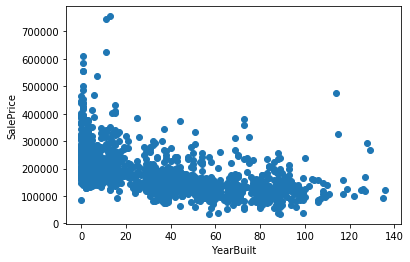

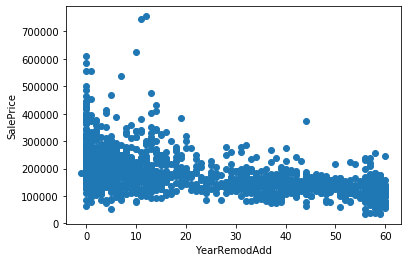

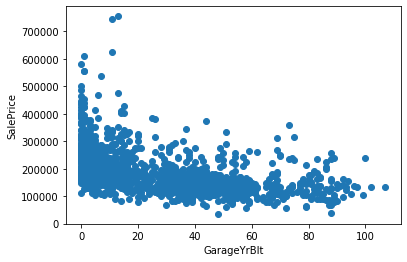

In [25]:
for feature in yearcol:
    if feature != 'YrSold':
        df[feature] = df['YrSold']-df[feature]
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

From the above scatter plot we see that the lesser the difference between yearsold and [YearBuilt,GarageYrBlt,YearRemodAdd] newer is the home and newer the home more is the saleprice of that home


In [26]:
df[yearcol].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

In [27]:
df[['GarageYrBlt','GarageType','SalePrice']].loc[df.GarageYrBlt.isnull(),:]

,GarageYrBlt,GarageType,SalePrice
39,NaN,Missing,82000
48,NaN,Missing,113000
78,NaN,Missing,136500
88,NaN,Missing,85000
89,NaN,Missing,123600
99,NaN,Missing,128950
108,NaN,Missing,115000
125,NaN,Missing,84500
127,NaN,Missing,87000
140,NaN,Missing,115000


In [28]:
df[['GarageYrBlt','GarageType','SalePrice']].loc[df.GarageYrBlt.isnull(),:].mean()

GarageYrBlt              NaN
SalePrice      103317.283951
dtype: float64

We can see that where Garage is Missing GarageBltYr is also Missing and SalePrice is lower.
We also observed that Sale Price is high when Garage is present in house and newer the Garage more is the SalePrice of that house and older the Garage less is the Sale Price of that house.
When the GarageBltYr is large the Garage is old and less is the salesprice equivalent to garage not present.
so lets impute those missing values of GarageYrBlt with Maxmimum GarageYrBlt value.


In [29]:
maxGarageYrBlt = df['GarageYrBlt'].max()
maxGarageYrBlt

107.0

In [30]:
df['GarageYrBlt'].fillna(107,inplace=True)

In [31]:
cont = [feature for feature in df[numerical] if feature not in yearcol and  df[feature].nunique()>25]

In [32]:
df.SalePrice.nunique()

663

In [33]:
df[cont].nunique()

LotFrontage       110
LotArea          1073
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
GrLivArea         861
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
ScreenPorch        76
SalePrice         663
dtype: int64

In [34]:
discrete = [feature for feature in df[numerical] if feature not in yearcol and  df[feature].nunique()<=25]

In [35]:
df[discrete].nunique()

MSSubClass      15
OverallQual     10
OverallCond      9
LowQualFinSF    24
BsmtFullBath     4
BsmtHalfBath     3
FullBath         4
HalfBath         3
BedroomAbvGr     8
KitchenAbvGr     4
TotRmsAbvGrd    12
Fireplaces       4
GarageCars       5
3SsnPorch       20
PoolArea         8
MiscVal         21
MoSold          12
dtype: int64

In [36]:
#df[discrete].isna().sum()

C:\Users\Akshay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Akshay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


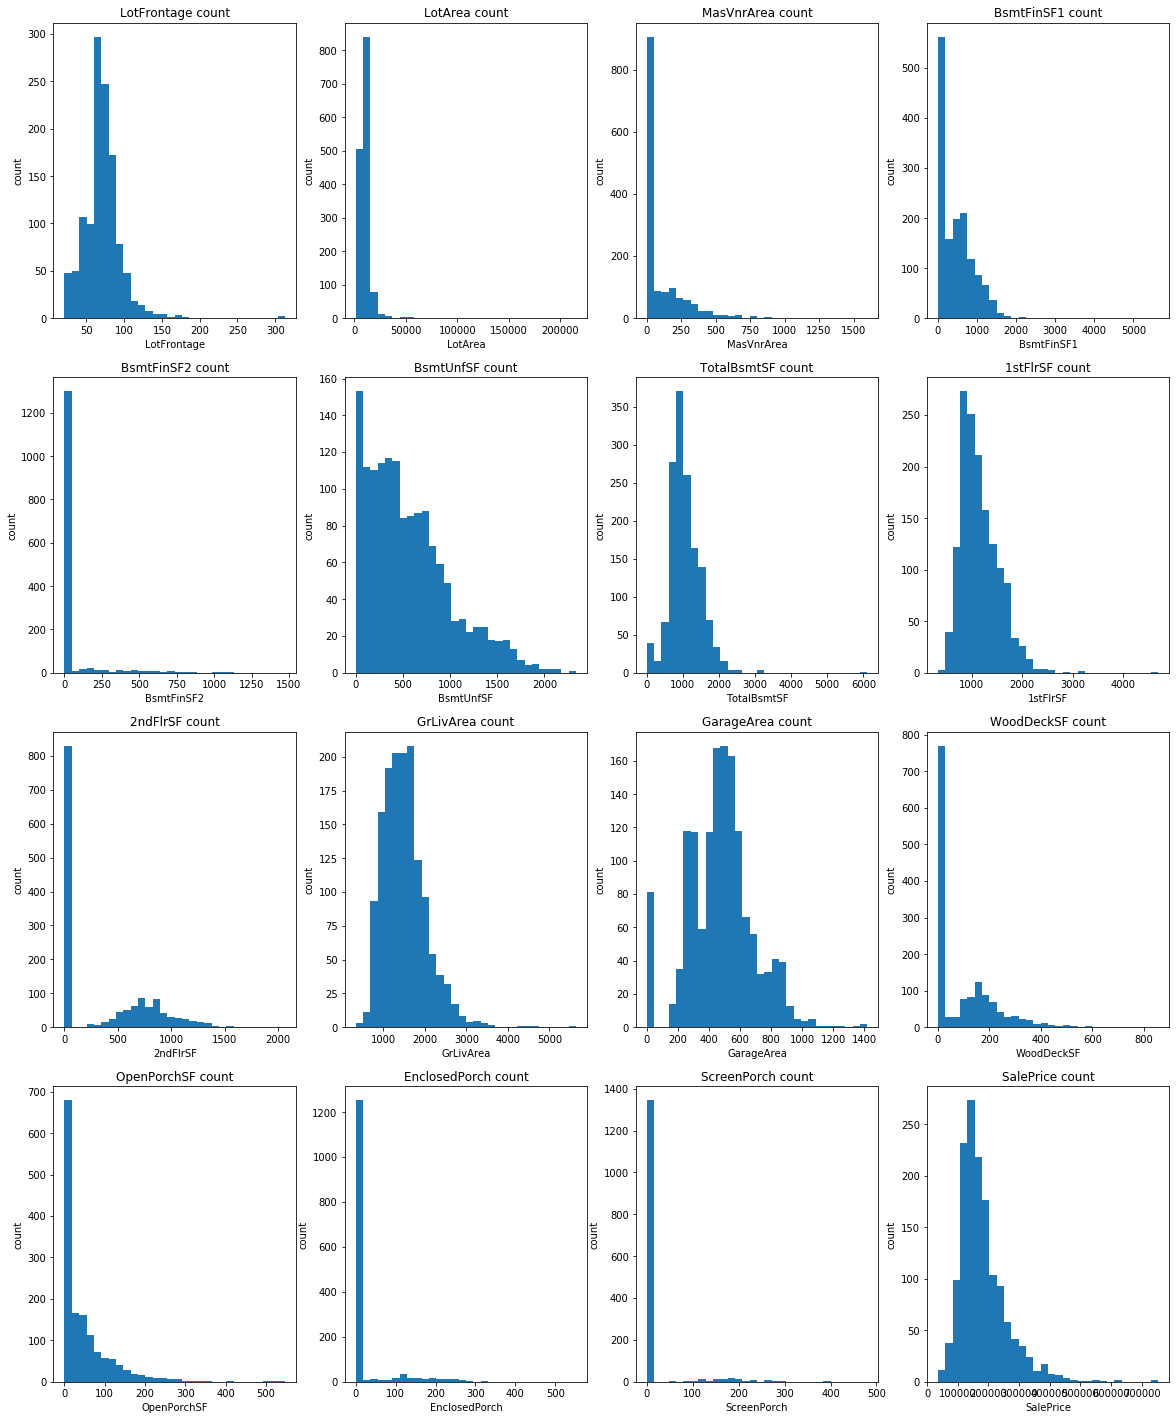

In [37]:
plt.figure(figsize=(20,25))
for feature in cont:
    plt.subplot(4,4,(cont.index(feature)+1))
    plt.hist(x=feature,bins=30,data=df)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature+' count')
plt.show()

In [38]:
df[numerical].isnull().sum().sort_values(ascending=False)

LotFrontage      259
MasVnrArea         8
SalePrice          0
BsmtFinSF2         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF1         0
BsmtHalfBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
BsmtFullBath       0
FullBath           0
YrSold             0
HalfBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
GarageYrBlt        0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
MSSubClass         0
dtype: int64

In [39]:
df['LotFrontage'].unique()


array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [40]:
df['LotFrontage'].mean()

70.04995836802665

In [41]:
df['LotFrontage'].fillna(value=70.0499,inplace=True)

In [42]:
df['LotFrontage'].isnull().sum()

0

In [43]:
df['LotFrontage'].dtype

dtype('float64')

In [44]:
df.MasVnrArea.mean()
#df.MasVnrArea.median()

103.68526170798899

In [45]:
df['MasVnrArea'].fillna(value=103.68526,inplace=True)

In [46]:
df.iloc[7:12]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,70.0499,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0000,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,69,58,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,69.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000
10,20,RL,70.0000,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,43,43,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,Missing,Detchd,43.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,0,2,2008,WD,Normal,129500
11,60,RL,85.0000,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,1,0,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,1.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,0,7,2006,New,Partial,345000


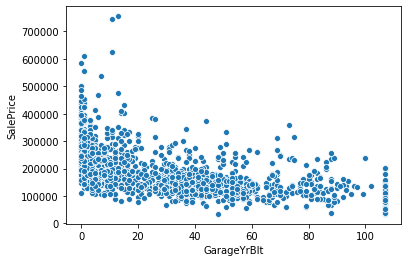

In [47]:
sns.scatterplot(x=df['GarageYrBlt'],y='SalePrice',data=df)

In [48]:
df.shape

(1460, 76)

In [49]:
len(numerical)

37

lets now check if any columns have missing value

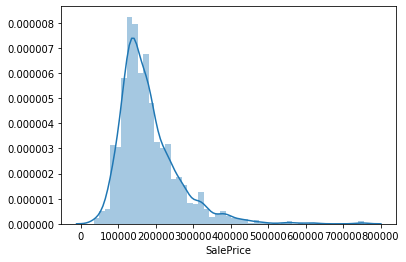

In [50]:
sns.distplot(df['SalePrice'])
plt.show()

from above we can see that the Data of the Target variable is right skewed so lets log transform the target variable to get normal distribution.

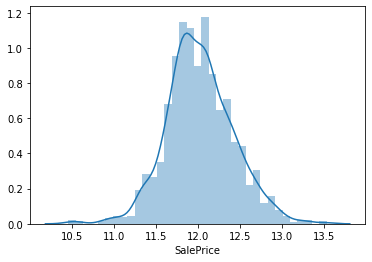

In [51]:
#Transforming the Target Variable to null the effect of Outliers
df['SalePrice'] = np.log(df['SalePrice'])
sns.distplot(df['SalePrice'])
plt.show()

# Feature Engineering

In [52]:
c=0
for x in catcol:
    print(" Feature {}: unique values {}: total count{}".format(x,df[x].unique(),len(df[x].unique())))
    c+=len(df[x].unique())
print(c)    

 Feature MSZoning: unique values ['RL' 'RM' 'C (all)' 'FV' 'RH']: total count5
 Feature Street: unique values ['Pave' 'Grvl']: total count2
 Feature LotShape: unique values ['Reg' 'IR1' 'IR2' 'IR3']: total count4
 Feature LandContour: unique values ['Lvl' 'Bnk' 'Low' 'HLS']: total count4
 Feature Utilities: unique values ['AllPub' 'NoSeWa']: total count2
 Feature LotConfig: unique values ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']: total count5
 Feature LandSlope: unique values ['Gtl' 'Mod' 'Sev']: total count3
 Feature Neighborhood: unique values ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']: total count25
 Feature Condition1: unique values ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']: total count9
 Feature Condition2: unique values ['Norm' 'Artery' 'RRNn' 'Feedr' 'Po

Lets Drop  category neighborhood,Exterior1st,Exterior2nd since it has a lot of sub categories 25,14,16

In [53]:
df.drop(columns=['Neighborhood','Exterior1st','Exterior2nd'],inplace=True)

#### There are many categories which have subcategories as Ex,Gd,TA,Fa,Po,Missing so lets map the categories as 5,4,3,2,1,0

In [54]:
catEx = [feature for feature in df.columns if df[feature].isin(['Ex','Gd','TA']).any()]

In [55]:
for x in catEx:
    print("Feature {}: unique values {}: total count{}".format(x,df[x].unique(),len(df[x].unique())))

Feature ExterQual: unique values ['Gd' 'TA' 'Ex' 'Fa']: total count4
Feature ExterCond: unique values ['TA' 'Gd' 'Fa' 'Po' 'Ex']: total count5
Feature BsmtQual: unique values ['Gd' 'TA' 'Ex' 'Missing' 'Fa']: total count5
Feature BsmtCond: unique values ['TA' 'Gd' 'Missing' 'Fa' 'Po']: total count5
Feature BsmtExposure: unique values ['No' 'Gd' 'Mn' 'Av' 'Missing']: total count5
Feature HeatingQC: unique values ['Ex' 'Gd' 'TA' 'Fa' 'Po']: total count5
Feature KitchenQual: unique values ['Gd' 'TA' 'Ex' 'Fa']: total count4
Feature FireplaceQu: unique values ['Missing' 'TA' 'Gd' 'Fa' 'Ex' 'Po']: total count6
Feature GarageQual: unique values ['TA' 'Fa' 'Gd' 'Missing' 'Ex' 'Po']: total count6
Feature GarageCond: unique values ['TA' 'Fa' 'Missing' 'Gd' 'Po' 'Ex']: total count6


In [56]:
len(catEx)

10

In [57]:
### We will handle BsmtExposure seperately
catEx.remove('BsmtExposure')

In [58]:
len(catEx)

9

In [59]:
def Cattonum(data,col):
    for x in col:
        data[x]=data[x].map({'Missing':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}).astype(int)
    

In [60]:
Cattonum(df,catEx)
df[catEx].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,4,3,4,3,5,4,0,3,3
1,3,3,4,3,5,3,3,3,3
2,4,3,4,3,5,4,3,3,3
3,3,3,3,4,4,4,4,3,3
4,4,3,4,3,5,4,3,3,3


Now lets Handle Basement Exposure ['No' 'Gd' 'Mn' 'Av' 'Missing']

In [61]:
df['BsmtExposure'] = df['BsmtExposure'].map({'Missing':0,'No':1,'Mn':2,'Av':3,'Gd':4}).astype(int)

In [62]:
df['BsmtExposure'].dtype

dtype('int32')

In [63]:
df['BsmtExposure'].unique()

array([1, 4, 2, 3, 0], dtype=int64)

In [64]:
df[catEx].dtypes

ExterQual      int32
ExterCond      int32
BsmtQual       int32
BsmtCond       int32
HeatingQC      int32
KitchenQual    int32
FireplaceQu    int32
GarageQual     int32
GarageCond     int32
dtype: object

In [65]:
catcol = [feature for feature in df.columns if df[feature].dtype=='O']

In [66]:
len(catcol)

26

In [67]:
c=0
for x in catcol:
    print(" Feature {}: unique values {}: total count{}".format(x,df[x].unique(),len(df[x].unique())))
    c+=len(df[x].unique())
print(c) 

 Feature MSZoning: unique values ['RL' 'RM' 'C (all)' 'FV' 'RH']: total count5
 Feature Street: unique values ['Pave' 'Grvl']: total count2
 Feature LotShape: unique values ['Reg' 'IR1' 'IR2' 'IR3']: total count4
 Feature LandContour: unique values ['Lvl' 'Bnk' 'Low' 'HLS']: total count4
 Feature Utilities: unique values ['AllPub' 'NoSeWa']: total count2
 Feature LotConfig: unique values ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']: total count5
 Feature LandSlope: unique values ['Gtl' 'Mod' 'Sev']: total count3
 Feature Condition1: unique values ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']: total count9
 Feature Condition2: unique values ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']: total count8
 Feature BldgType: unique values ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']: total count5
 Feature HouseStyle: unique values ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']: total count8
 Feature RoofStyle: unique values ['Gable' 'Hi

#### We have done EDA and plotted the boxplot for categorical variables and seen average mean price with respect to different categories and subcategories

lets Map CentralAir yes to 1 and no to 0
lets map PavedDrive Y to 2,N to 0,P to 1

In [68]:
df['CentralAir'] = df['CentralAir'].map({'Y':1,'N':0}).astype(int)
df['PavedDrive'] = df['PavedDrive'].map({'Y':2,'P':1,'N':0}).astype(int)

lets map GarageFinish Fin to 3,RFn to 2,Unf to 1,Missing to 0

In [69]:
df['GarageFinish'] = df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'Missing':0}).astype(int)

In [70]:
c=0
for x in [feature for feature in df.columns if df[feature].dtype=='O']:
    print(" Feature {}: unique values {}: total count{}".format(x,df[x].unique(),len(df[x].unique())))
    c+=len(df[x].unique())
print(c)

 Feature MSZoning: unique values ['RL' 'RM' 'C (all)' 'FV' 'RH']: total count5
 Feature Street: unique values ['Pave' 'Grvl']: total count2
 Feature LotShape: unique values ['Reg' 'IR1' 'IR2' 'IR3']: total count4
 Feature LandContour: unique values ['Lvl' 'Bnk' 'Low' 'HLS']: total count4
 Feature Utilities: unique values ['AllPub' 'NoSeWa']: total count2
 Feature LotConfig: unique values ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']: total count5
 Feature LandSlope: unique values ['Gtl' 'Mod' 'Sev']: total count3
 Feature Condition1: unique values ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']: total count9
 Feature Condition2: unique values ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']: total count8
 Feature BldgType: unique values ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']: total count5
 Feature HouseStyle: unique values ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']: total count8
 Feature RoofStyle: unique values ['Gable' 'Hi

In [71]:
df.shape

(1460, 73)

#### Now since we have converted lot of categorical data columns in to numerical discrete data lets update our catcol and numerical list.

In [72]:
numerical = [feature for feature in df.columns if df[feature].dtype!='O']

In [73]:
df[numerical].shape

(1460, 50)

In [74]:
catcol = [feature for feature in df.columns if df[feature].dtype=='O']

In [75]:
df[catcol].shape

(1460, 23)

In [76]:
dummies = pd.get_dummies(df[catcol],drop_first=True,prefix=catcol)

In [77]:
dummies.shape

(1460, 112)

In [79]:
df = pd.concat([df,dummies],axis=1)

In [80]:
df.drop(columns=catcol,inplace=True)

In [81]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,...,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Missing,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,5,5,196.0,4,3,4,3,1,706,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,5.0,2,2,548,3,3,2,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,31,31,0.0,3,3,4,3,4,978,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,31.0,2,2,460,3,3,2,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,7,6,162.0,4,3,4,3,2,486,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,7.0,2,2,608,3,3,2,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,91,36,0.0,3,3,3,4,1,216,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,8.0,1,3,642,3,3,2,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,8,8,350.0,4,3,4,3,3,655,0,490,1145,5,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,8.0,2,3,836,3,3,2,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [82]:
df.shape

(1460, 162)

In [83]:
df1 = df.copy()
#df = df1.copy()

In [84]:
y = df.pop('SalePrice')
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [85]:
y=pd.DataFrame(y)

In [86]:
X=df.copy()

# Feature Scaling 

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [88]:
scaler = StandardScaler()

In [89]:
col = list(X_train.columns)

In [90]:
X_train.loc[:,col] = scaler.fit_transform(X_train.loc[:,col])

C:\Users\Akshay\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [91]:
X_test.loc[:,col] = scaler.transform(X_test.loc[:,col])

C:\Users\Akshay\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [92]:
X_train.shape

(1021, 161)

In [93]:
X_test.shape

(439, 161)

In [94]:
y_train.shape

(1021, 1)

In [95]:
y_train.head()

,SalePrice
318,12.468437
239,11.635143
986,11.669929
1416,11.715866
390,11.686879


In [96]:
from sklearn.feature_selection import RFE

#### Use RFE for feature elimination

In [97]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 31),
 ('LotFrontage', False, 12),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 64),
 ('ExterQual', False, 72),
 ('ExterCond', False, 80),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 99),
 ('BsmtExposure', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 21),
 ('CentralAir', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 107),
 ('FullBath', False, 29),
 ('HalfBath', False, 24),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 27),
 ('Fireplaces', False, 26),
 ('FireplaceQu', True, 1),
 ('GarageYrBlt', False, 19),
 ('GarageFinish', False, 44),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 

In [99]:
col = X_train.columns[rfe.support_]

In [100]:
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenAbvGr', 'KitchenQual', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'GarageQual', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Condition1_Norm', 'Condition2_PosN',
       'BldgType_Twnhs', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Foundation_PConc', 'BsmtFinType1_Missing',
       'BsmtFinType2_Missing', 'Electrical_Missing', 'Electrical_Mix',
       'Functional_Min1', 'Functional_Min2', 'Functional_Typ',
       'GarageType_Missing', 'SaleType_New', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [101]:
X_train = X_train[col]

In [102]:
X_train.shape

(1021, 50)

In [103]:
X_test = X_test[col]

In [104]:
X_test.shape

(439, 50)

In [106]:
# after RFE
X_test_new = X_test.copy()
#X_test = X_test_new.copy()
X_train_new = X_train.copy()
#X_train = X_train_new.copy()

# RIDGE Regression

In [107]:
# list of alphas to tune
params = {'alpha': [0.015,0.030,0.060,0.1,0.15,0.2,0.5,1,2,3,6,10,11,12,15,20,25,30,50,100,150,200,250,300,350,400,500]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.015, 0.03, 0.06, 0.1, 0.15, 0.2, 0.5, 1, 2,
                                   3, 6, 10, 11, 12, 15, 20, 25, 30, 50, 100,
                                   150, 200, 250, 300, 350, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,0.005004,6.324852e-04,0.002201,4.004241e-04,3,{'alpha': 3},-0.080027,-0.098613,-0.091082,-0.086556,-0.078502,-0.086949,0.007383,1,-0.075612,-0.074177,-0.074610,-0.076395,-0.076184,-0.075396,0.000868
8,0.005004,6.321838e-04,0.002001,2.780415e-07,2,{'alpha': 2},-0.080021,-0.098617,-0.090728,-0.087118,-0.078369,-0.086964,0.007376,2,-0.075336,-0.074120,-0.074359,-0.076164,-0.075900,-0.075176,0.000813
10,0.005004,1.096367e-03,0.002201,4.001621e-04,6,{'alpha': 6},-0.080228,-0.098596,-0.092022,-0.085364,-0.078982,-0.087032,0.007382,3,-0.076462,-0.074319,-0.075404,-0.077055,-0.076996,-0.076047,0.001048
7,0.005405,1.019010e-03,0.002200,4.006881e-04,1,{'alpha': 1},-0.080109,-0.098621,-0.090343,-0.087785,-0.078367,-0.087038,0.007332,4,-0.075039,-0.074059,-0.074168,-0.075926,-0.075630,-0.074965,0.000752
6,0.006804,1.165182e-03,0.003002,6.342950e-04,0.5,{'alpha': 0.5},-0.080164,-0.098623,-0.090159,-0.088212,-0.078381,-0.087101,0.007314,5,-0.074883,-0.074026,-0.074072,-0.075815,-0.075495,-0.074858,0.000725
5,0.005804,1.166883e-03,0.003202,4.000665e-04,0.2,{'alpha': 0.2},-0.080208,-0.098625,-0.090048,-0.088556,-0.078389,-0.087158,0.007307,6,-0.074788,-0.074005,-0.074018,-0.075751,-0.075422,-0.074797,0.000712
4,0.006606,1.021031e-03,0.002401,4.889494e-04,0.15,{'alpha': 0.15},-0.080217,-0.098625,-0.090028,-0.088618,-0.078390,-0.087169,0.007306,7,-0.074772,-0.074002,-0.074009,-0.075741,-0.075410,-0.074787,0.000710
3,0.007205,9.810973e-04,0.004204,1.473955e-03,0.1,{'alpha': 0.1},-0.080226,-0.098626,-0.090011,-0.088681,-0.078391,-0.087180,0.007305,8,-0.074756,-0.073998,-0.074000,-0.075730,-0.075398,-0.074777,0.000708
2,0.007005,1.507891e-07,0.002801,7.487488e-04,0.06,{'alpha': 0.06},-0.080233,-0.098626,-0.089998,-0.088733,-0.078394,-0.087190,0.007305,9,-0.074744,-0.073996,-0.073993,-0.075721,-0.075390,-0.074769,0.000706
1,0.007005,6.333146e-04,0.003002,7.008046e-07,0.03,{'alpha': 0.03},-0.080238,-0.098626,-0.089988,-0.088773,-0.078395,-0.087197,0.007304,10,-0.074734,-0.073994,-0.073988,-0.075715,-0.075383,-0.074763,0.000705


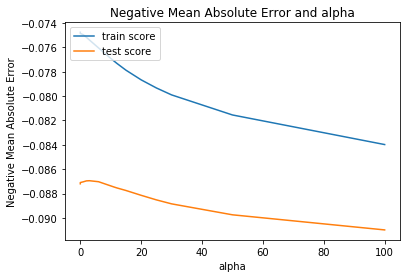

In [109]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([[ 0.01951668,  0.07572538,  0.04754087, -0.05512808, -0.01985784,
         0.01219943,  0.01420299,  0.03802125,  0.00592671,  0.00486154,
         0.04547697,  0.05381962,  0.05686167,  0.00189137,  0.08699642,
         0.01655089, -0.01922929,  0.01517885,  0.02755741,  0.0239481 ,
         0.01207625,  0.02281278,  0.07748938,  0.03886682,  0.13712937,
         0.092585  ,  0.01748291, -0.0558679 , -0.01569635, -0.03281113,
        -0.02797354,  0.34261268,  0.08780147,  0.08368938,  0.0829382 ,
         0.19420819,  0.15481343,  0.16719582,  0.01597885,  0.03172214,
        -0.01615072,  0.        ,  0.        ,  0.01844446,  0.0211554 ,
         0.03895749,  0.01597703,  0.01557778,  0.02134336,  0.01557778]])

In [111]:
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([[ 0.0192124 ,  0.07717645,  0.04776522, -0.05555478, -0.0194306 ,
         0.01335265,  0.01436182,  0.03355236,  0.00547184,  0.00370803,
         0.03965275,  0.05554711,  0.05464316,  0.00174258,  0.08645874,
         0.0182319 , -0.01820961,  0.01585622,  0.02828711,  0.02770574,
         0.00948575,  0.02216129,  0.06953151,  0.03474675,  0.12201747,
         0.0783393 ,  0.01782242, -0.05451912, -0.01592488, -0.03306156,
        -0.02802331,  0.30203204,  0.07763739,  0.0737724 ,  0.07308442,
         0.17024764,  0.13500104,  0.14804717,  0.01571688,  0.02337422,
        -0.01000057,  0.        ,  0.        ,  0.01795809,  0.02029076,
         0.03755082,  0.0157015 ,  0.01528009,  0.02174026,  0.01528009]])

In [112]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.015, 0.03, 0.06, 0.1, 0.15, 0.2, 0.5, 1, 2,
                                   3, 6, 10, 11, 12, 15, 20, 25, 30, 50, 100,
                                   150, 200, 250, 300, 350, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [113]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.269377,0.525245,0.003204,1.169012e-03,0.015,{'alpha': 0.015},-0.093678,-0.103196,-0.107673,-0.095022,-0.102188,-0.100345,0.005255,1,-0.099260,-0.085519,-0.096290,-0.100151,-0.098545,-0.095953,0.005371
1,0.005003,0.000632,0.001801,4.003287e-04,0.03,{'alpha': 0.03},-0.102322,-0.114463,-0.114849,-0.110332,-0.117023,-0.111789,0.005215,2,-0.112131,-0.098271,-0.108017,-0.111911,-0.111727,-0.108411,0.005292
2,0.004603,0.000800,0.002001,6.327868e-04,0.06,{'alpha': 0.06},-0.126750,-0.137845,-0.130678,-0.129559,-0.135463,-0.132054,0.004036,3,-0.133251,-0.122352,-0.128823,-0.132127,-0.133480,-0.130007,0.004173
3,0.005404,0.000490,0.001601,4.900961e-04,0.1,{'alpha': 0.1},-0.157932,-0.169303,-0.159719,-0.158377,-0.164760,-0.162014,0.004378,4,-0.161240,-0.155621,-0.159852,-0.160863,-0.164570,-0.160430,0.002879
4,0.004203,0.000401,0.002001,4.623108e-07,0.15,{'alpha': 0.15},-0.196551,-0.207908,-0.198257,-0.191322,-0.207402,-0.200284,0.006434,5,-0.198856,-0.197520,-0.199047,-0.196547,-0.203456,-0.199085,0.002368
5,0.004403,0.000490,0.001601,4.901745e-04,0.2,{'alpha': 0.2},-0.232741,-0.240330,-0.233304,-0.221021,-0.247219,-0.234921,0.008726,6,-0.232654,-0.232818,-0.234084,-0.232142,-0.237810,-0.233902,0.002056
24,0.004203,0.000399,0.002001,3.371748e-07,350,{'alpha': 350},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310610,0.009879,7,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165
23,0.005204,0.000980,0.002402,4.905440e-04,300,{'alpha': 300},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310610,0.009879,7,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165
22,0.004403,0.001021,0.001801,4.003764e-04,250,{'alpha': 250},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310610,0.009879,7,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165
21,0.004203,0.000981,0.002201,4.007340e-04,200,{'alpha': 200},-0.312646,-0.312179,-0.306816,-0.295412,-0.325987,-0.310610,0.009879,7,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


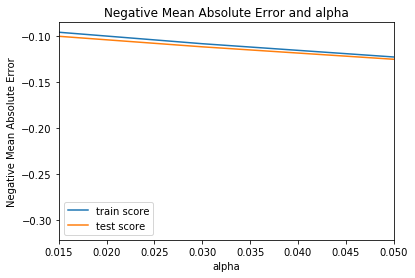

In [114]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlim(0.015,0.050)
#plt.ylim(-0.09,-0.15)
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower left')
plt.show()

In [414]:
lasso.coef_

array([ 0.0108972 ,  0.10955631,  0.02843125, -0.05025781, -0.02414525,
        0.02334519,  0.00967445,  0.00292441,  0.        , -0.        ,
        0.00618508,  0.01777256,  0.        , -0.        ,  0.10743672,
        0.02114498, -0.        ,  0.02219273,  0.03178065,  0.04728722,
        0.00183004,  0.        ,  0.        ,  0.        ,  0.01023152,
       -0.02155745,  0.00560658, -0.02656489, -0.00700416, -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ])

In [116]:
alpha =0.03

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
lasso.coef_

array([ 0.00241344,  0.1184082 ,  0.00056885, -0.02835663, -0.02870927,
        0.02120909,  0.00462157,  0.00284783,  0.        , -0.        ,
        0.0061575 ,  0.0173082 ,  0.        , -0.        ,  0.09194707,
        0.0113794 , -0.        ,  0.02232295,  0.02732639,  0.03885574,
        0.00922054,  0.        ,  0.        , -0.        ,  0.01196506,
       -0.01471802,  0.        , -0.007812  , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ])

### for subjective questions 1 doubling the coeff

In [118]:
from sklearn.feature_selection import SelectFromModel

In [119]:
X_train.shape

(1021, 50)

In [120]:
ls =  Lasso(alpha=0.030).fit(X_train, y_train)
len(ls.coef_)
#sorted(Lasso(alpha=0.030).fit(X_train, y_train).coef_)

50

In [121]:
model_parameters = list(ls.coef_) ## lm is model name 
model_parameters.insert(0, ls.intercept_)
model_parameters = [np.round(x, 3) for x in model_parameters]
cols = X_train.columns  
cols = cols.insert(0, "constant")

final = list(zip(cols, np.abs(model_parameters)))

In [122]:
def Sort_Tuple(tup):  
    lst = len(tup)  
    for i in range(0, lst):        
        for j in range(0, lst-i-1):  
            if (tup[j][1] > tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup  
  

final = Sort_Tuple(final)

print(final)

[('BsmtFinSF2', 0.0), ('BsmtUnfSF', 0.0), ('2ndFlrSF', 0.0), ('LowQualFinSF', 0.0), ('KitchenAbvGr', 0.0), ('GarageQual', 0.0), ('MSZoning_FV', 0.0), ('MSZoning_RH', 0.0), ('Condition1_Norm', 0.0), ('BldgType_Twnhs', 0.0), ('RoofStyle_Gable', 0.0), ('RoofStyle_Hip', 0.0), ('RoofMatl_CompShg', 0.0), ('RoofMatl_Membran', 0.0), ('RoofMatl_Metal', 0.0), ('RoofMatl_Roll', 0.0), ('RoofMatl_Tar&Grv', 0.0), ('RoofMatl_WdShake', 0.0), ('RoofMatl_WdShngl', 0.0), ('Foundation_PConc', 0.0), ('BsmtFinType1_Missing', 0.0), ('BsmtFinType2_Missing', 0.0), ('Electrical_Missing', 0.0), ('Electrical_Mix', 0.0), ('Functional_Min1', 0.0), ('Functional_Min2', 0.0), ('Functional_Typ', 0.0), ('GarageType_Missing', 0.0), ('SaleType_New', 0.0), ('SaleCondition_Normal', 0.0), ('SaleCondition_Partial', 0.0), ('OverallCond', 0.001), ('LotArea', 0.002), ('BsmtFinSF1', 0.003), ('BsmtExposure', 0.005), ('TotalBsmtSF', 0.006), ('Condition2_PosN', 0.008), ('GarageArea', 0.009), ('BsmtFullBath', 0.011), ('MSZoning_RL', 

In [123]:
fsm = SelectFromModel(Lasso(alpha=0.030,random_state=0))
fsm.fit(X_train,y_train)
subjective_Qs1 = X_train.columns[(fsm.get_support())]
subjective_Qs1

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'FireplaceQu', 'GarageCars',
       'GarageArea', 'MSZoning_RL', 'MSZoning_RM', 'Condition2_PosN'],
      dtype='object')

In [124]:
len(subjective_Qs1)

19

In [129]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [130]:
alpha = 6
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)


Ridge(alpha=6, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [131]:
ridge1.coef_

array([[ 0.0192124 ,  0.07717645,  0.04776522, -0.05555478, -0.0194306 ,
         0.01335265,  0.01436182,  0.03355236,  0.00547184,  0.00370803,
         0.03965275,  0.05554711,  0.05464316,  0.00174258,  0.08645874,
         0.0182319 , -0.01820961,  0.01585622,  0.02828711,  0.02770574,
         0.00948575,  0.02216129,  0.06953151,  0.03474675,  0.12201747,
         0.0783393 ,  0.01782242, -0.05451912, -0.01592488, -0.03306156,
        -0.02802331,  0.30203204,  0.07763739,  0.0737724 ,  0.07308442,
         0.17024764,  0.13500104,  0.14804717,  0.01571688,  0.02337422,
        -0.01000057,  0.        ,  0.        ,  0.01795809,  0.02029076,
         0.03755082,  0.0157015 ,  0.01528009,  0.02174026,  0.01528009]])

In [127]:
X_train1 = X_train[subjective_Qs1]
print(X_train1.shape)
X_test1 = X_test[subjective_Qs1]
X_test1.shape

(1021, 19)


(439, 19)

#### dropping the 5 most important variables.

In [132]:
dropvar = ['OverallQual','GrLivArea','GarageCars','YearRemodAdd','YearBuilt']

In [133]:
X_train1.drop(columns=dropvar,inplace=True)
X_test1.drop(columns=dropvar,inplace=True)

C:\Users\Akshay\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
fsm = SelectFromModel(Lasso(alpha=0.015,random_state=0))
fsm.fit(X_train,y_train)
selected_feat = X_train.columns[(fsm.get_support())]
selected_feat

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'FireplaceQu', 'GarageCars',
       'GarageArea', 'MSZoning_RL', 'MSZoning_RM', 'Condition1_Norm',
       'Condition2_PosN', 'BldgType_Twnhs'],
      dtype='object')

In [142]:
selected_feat
len(selected_feat)

21

In [144]:
lasso = Lasso(alpha=0.015)

In [145]:
lasso.fit(X_train[selected_feat], y_train) 

Lasso(alpha=0.015, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [146]:
ypred = pd.DataFrame(lasso.predict(X_train[selected_feat]))

In [147]:
from sklearn.metrics import r2_score

In [148]:
ypred.shape

(1021, 1)

In [149]:
y_train.shape

(1021, 1)

In [150]:
r2_score(y_train,ypred)

0.8705333519645281

In [151]:
X_test = X_test[selected_feat]

In [152]:
X_test.shape

(439, 21)

In [153]:
ypred_test = pd.DataFrame(lasso.predict(X_test))

In [154]:
X_test.shape

(439, 21)

In [155]:
X_train = X_train[selected_feat]

In [156]:
X_train.shape

(1021, 21)

In [157]:
r2_score(y_test,ypred_test)

0.8558567322710678

In [158]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [159]:
X_train.shape

(1021, 21)

In [160]:
X_train_rfe = X_train.copy()

In [161]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     359.7
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:44:20   Log-Likelihood:                 592.15
No. Observations:                1021   AIC:                            -1140.
Df Residuals:                     999   BIC:                            -1032.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0232      0.004   28

C:\Users\Akshay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [162]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,GarageCars,5.66
16,GarageArea,5.64
9,TotalBsmtSF,5.54
10,1stFlrSF,4.96
4,YearBuilt,3.44
2,OverallQual,3.39
18,MSZoning_RM,3.32
17,MSZoning_RL,3.24
6,BsmtQual,3.07
13,KitchenQual,2.33


GarageArea has high VIF value and High P value lets drop that column

In [163]:
X_train_rfe.drop(["GarageArea"], axis = 1,inplace=True)

In [164]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     378.0
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:44:24   Log-Likelihood:                 592.03
No. Observations:                1021   AIC:                            -1142.
Df Residuals:                    1000   BIC:                            -1039.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0232      0.004   28

In [165]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,TotalBsmtSF,5.51
10,1stFlrSF,4.94
4,YearBuilt,3.44
2,OverallQual,3.39
17,MSZoning_RM,3.26
16,MSZoning_RL,3.20
6,BsmtQual,3.05
13,KitchenQual,2.32
5,YearRemodAdd,2.31
11,GrLivArea,2.30


TotalBsmtSF has high VIF value and High P value lets drop that column


In [166]:
X_train_rfe.drop(["TotalBsmtSF"], axis = 1,inplace=True)

In [167]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     398.1
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:44:27   Log-Likelihood:                 591.87
No. Observations:                1021   AIC:                            -1144.
Df Residuals:                    1001   BIC:                            -1045.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0232      0.004   28

In [168]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,YearBuilt,3.43
2,OverallQual,3.37
16,MSZoning_RM,3.26
15,MSZoning_RL,3.20
12,KitchenQual,2.32
5,YearRemodAdd,2.30
10,GrLivArea,2.27
6,BsmtQual,2.19
9,1stFlrSF,2.18
8,BsmtFinSF1,2.13


BsmtFinSF1 has high VIF value and High P value lets drop that column

In [169]:
#X_train_new = X_train_rfe.copy()
#X_train_rfe = X_train_new.copy()

In [170]:
X_train_rfe.drop(["BsmtFinSF1"], axis = 1,inplace=True)

In [171]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     420.4
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:44:30   Log-Likelihood:                 591.66
No. Observations:                1021   AIC:                            -1145.
Df Residuals:                    1002   BIC:                            -1052.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0232      0.004   28

In [172]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,YearBuilt,3.38
2,OverallQual,3.37
15,MSZoning_RM,3.26
14,MSZoning_RL,3.20
11,KitchenQual,2.32
9,GrLivArea,2.26
5,YearRemodAdd,2.26
6,BsmtQual,2.16
8,1stFlrSF,2.01
13,GarageCars,1.82


MSZoning_RL has High P value lets drop that column

In [173]:
X_train_rfe.drop(["MSZoning_RL"], axis = 1,inplace=True)

In [174]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     445.0
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:44:36   Log-Likelihood:                 591.07
No. Observations:                1021   AIC:                            -1146.
Df Residuals:                    1003   BIC:                            -1057.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0232      0.004   28

In [175]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,YearBuilt,3.37
2,OverallQual,3.35
11,KitchenQual,2.32
9,GrLivArea,2.26
5,YearRemodAdd,2.24
6,BsmtQual,2.16
8,1stFlrSF,1.98
13,GarageCars,1.82
12,FireplaceQu,1.54
7,BsmtExposure,1.44


In [176]:
final_feat = pd.DataFrame(X_train_rfe.columns)

In [177]:
final_feat 

,0
0,const
1,LotArea
2,OverallQual
3,OverallCond
4,YearBuilt
5,YearRemodAdd
6,BsmtQual
7,BsmtExposure
8,1stFlrSF
9,GrLivArea


In [178]:
l = [feature for feature in X_train_rfe.columns if feature!='const']

In [179]:
lasso1 = Lasso(alpha=0.015)
#0.0015

In [180]:
lasso1.fit(X_train_rfe[l], y_train) 

Lasso(alpha=0.015, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [181]:
ypredtrain = pd.DataFrame(lasso1.predict(X_train_rfe[l]))

In [182]:
ypredtrain

,0
0,12.555147
1,11.802056
2,11.824453
3,11.703344
4,11.721814
...,...
1016,12.253618
1017,12.695447
1018,12.570125
1019,11.611161


In [183]:
r2_score(y_train,ypredtrain)

0.870346307892084

In [184]:
ypredtest = pd.DataFrame(lasso1.predict(X_test[l]))

In [185]:
r2_score(y_test,ypredtest)

0.8546240674440612

In [186]:
X_test[l].shape

(439, 17)

In [187]:
l

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtQual',
 'BsmtExposure',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'FireplaceQu',
 'GarageCars',
 'MSZoning_RM',
 'Condition1_Norm',
 'Condition2_PosN',
 'BldgType_Twnhs']

### Doubling the values of alpha for Ridge and Lasso

In [188]:
Ridge1 = Ridge(alpha=3)

In [189]:
Ridge1.fit(X_train_rfe[l], y_train)


Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [190]:
YTR = pd.DataFrame(Ridge1.predict(X_train_rfe[l]))

In [191]:
YTT = pd.DataFrame(Ridge1.predict(X_test[l]))

In [192]:
print(r2_score(y_train,YTR))
print(r2_score(y_test,YTT))

0.8829410317386726
0.8476098863982652


In [193]:
Ridge2 = Ridge(alpha=6)
Ridge2.fit(X_train_rfe[l], y_train)
YTR1 = pd.DataFrame(Ridge2.predict(X_train_rfe[l]))
YTT1 = pd.DataFrame(Ridge2.predict(X_test[l]))
print(r2_score(y_train,YTR1))
print(r2_score(y_test,YTT1))


0.8829318104200453
0.8478130384710125


In [194]:
Lasso1 = Lasso(alpha=0.015)
Lasso1.fit(X_train_rfe[l], y_train)
YTR2 = pd.DataFrame(Lasso1.predict(X_train_rfe[l]))
YTT2 = pd.DataFrame(Lasso1.predict(X_test[l]))
print(r2_score(y_train,YTR2))
print(r2_score(y_test,YTT2))

0.870346307892084
0.8546240674440612


In [195]:
Lasso1.coef_

array([ 0.01144629,  0.10901654,  0.02963569, -0.05118197, -0.02244265,
        0.02580339,  0.01017392,  0.02448128,  0.10689791,  0.02336138,
        0.02234858,  0.03218731,  0.04856221, -0.02949678,  0.00545096,
       -0.02639789, -0.00754896])

In [196]:
Lasso2 = Lasso(alpha=0.030)
Lasso2.fit(X_train_rfe[l], y_train)
YTR2 = pd.DataFrame(Lasso2.predict(X_train_rfe[l]))
YTT2 = pd.DataFrame(Lasso2.predict(X_test[l]))
print(r2_score(y_train,YTR2))
print(r2_score(y_test,YTT2))

0.8367249206252887
0.834036291385126


In [197]:
Lasso2.coef_

array([ 0.00320618,  0.11794831,  0.00224734, -0.02911552, -0.02669292,
        0.02349003,  0.00517619,  0.02514046,  0.09159765,  0.01387506,
        0.02275018,  0.02753377,  0.04628141, -0.02441329,  0.        ,
       -0.00773386, -0.        ])